### This notebook is used for experimenting with  **k-means, DBSCAN** algorithms to create new columns

In [136]:
#Importing the required packages
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas.tools import sjoin
from geopandas import GeoSeries
import numpy as np

import descartes
from shapely.geometry import Point
import csv
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans,DBSCAN


In [103]:
#Shape file for Atlanta
plt.clf()
shape = gp.read_file(r'Cities_Georgia.shp')
city_list_fulton = ['Atlanta','Alpharetta','Chattahoochee Hills','Sandy Springs','Union City','Hapeville','Roswell','Johns Creek','East Point','South Fulton','Fairburn','Milton']
fulton_shape = shape[shape["Name"].isin(city_list_fulton)]
fulton_shape.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)

city_list = ['Atlanta']
atlanta_shape = shape[shape["Name"].isin(city_list)]
atlanta_shape.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)


<Figure size 432x288 with 0 Axes>

In [74]:
# read accident dataset
df = pd.read_csv ("US_Accidents_Dec20.csv")
print("read complete")
#df.head()
# convert start time, end time as datetime and extract start date, year
df['Start_Time'] = pd.to_datetime(df.Start_Time)
df['End_Time'] = pd.to_datetime(df.End_Time)
df['Start_Date'] = df['Start_Time'].dt.date
df['Start_Date'] = pd.to_datetime(df.Start_Date)
df["year"] =pd.DatetimeIndex(df['Start_Date']).year

read complete


In [147]:
# Filter 2019 dataset
newdf_2019 = df[(df['year']==2019)& (df["State"] =='GA') & (df["County"] =='Fulton')].reset_index()
newdf_2019=newdf_2019[['Start_Lat','Start_Lng']]
newdf_2019=newdf_2019.rename(columns={"Start_Lat": "latitude", "Start_Lng": "longitude"})
print(newdf_2019.head())


newdf_2019_np=newdf_2019[['longitude', 'latitude']].to_numpy()
print(newdf_2019_np[:5])

# convert the accident latitude longitude to a geo pandads dataframe
geo_df_2019 = gpd.GeoDataFrame(newdf_2019.drop(['longitude', 'latitude'], axis=1), crs={'init': 'epsg:4326'}, geometry=[Point(xy) for xy in zip(newdf_2019.longitude, newdf_2019.latitude)])
print(geo_df_2019.head())

# filter accidents in atlant
geo_df_2019_atlanta = sjoin(geo_df_2019, atlanta_shape, how='inner')
#geo_df_2019_atlanta=geo_df_2019_atlanta['geometry']
print(geo_df_2019_atlanta.head())

    latitude  longitude
0  33.912956 -84.391212
1  33.791977 -84.392410
2  33.791977 -84.392410
3  33.783630 -84.495560
4  33.652176 -84.367058
[[-84.391212  33.912956]
 [-84.39241   33.791977]
 [-84.39241   33.791977]
 [-84.49556   33.78363 ]
 [-84.367058  33.652176]]
                     geometry
0  POINT (-84.39121 33.91296)
1  POINT (-84.39241 33.79198)
2  POINT (-84.39241 33.79198)
3  POINT (-84.49556 33.78363)
4  POINT (-84.36706 33.65218)
                     geometry  index_right  OBJECTID     Name         Acres  \
1  POINT (-84.39241 33.79198)          536      4535  Atlanta  87420.264218   
2  POINT (-84.39241 33.79198)          536      4535  Atlanta  87420.264218   
3  POINT (-84.49556 33.78363)          536      4535  Atlanta  87420.264218   
4  POINT (-84.36706 33.65218)          536      4535  Atlanta  87420.264218   
8  POINT (-84.38958 33.80078)          536      4535  Atlanta  87420.264218   

     Sq_Miles County20 County10                                GlobalID  \


In [99]:
# Filter 2020 dataset
newdf_2020 = df[(df['year']==2020)& (df["State"] =='GA') & (df["County"] =='Fulton')].reset_index()
newdf_2020=newdf_2020[['Start_Lat','Start_Lng']]
newdf_2020=newdf_2020.rename(columns={"Start_Lat": "latitude", "Start_Lng": "longitude"})
print(newdf_2020.head())

# convert the accident latitude longitude to a geo pandads dataframe
geo_df_2020 = gpd.GeoDataFrame(newdf_2020.drop(['longitude', 'latitude'], axis=1), crs={'init': 'epsg:4326'}, geometry=[Point(xy) for xy in zip(newdf_2020.longitude, newdf_2020.latitude)])
print(geo_df_2020.head())


# filter accidents in atlant
geo_df_2020_atlanta = sjoin(geo_df_2020, atlanta_shape, how='inner')
#geo_df_2020_atlanta=geo_df_2020_atlanta['geometry']
print(geo_df_2020_atlanta.head())

    latitude  longitude
0  33.744804 -84.350777
1  33.758720 -84.379395
2  33.797970 -84.392929
3  33.761116 -84.380890
4  33.795078 -84.392036
                     geometry
0  POINT (-84.35078 33.74480)
1  POINT (-84.37940 33.75872)
2  POINT (-84.39293 33.79797)
3  POINT (-84.38089 33.76112)
4  POINT (-84.39204 33.79508)
                     geometry  index_right  OBJECTID     Name         Acres  \
0  POINT (-84.35078 33.74480)          536      4535  Atlanta  87420.264218   
1  POINT (-84.37940 33.75872)          536      4535  Atlanta  87420.264218   
2  POINT (-84.39293 33.79797)          536      4535  Atlanta  87420.264218   
3  POINT (-84.38089 33.76112)          536      4535  Atlanta  87420.264218   
4  POINT (-84.39204 33.79508)          536      4535  Atlanta  87420.264218   

     Sq_Miles County20 County10                                GlobalID  \
0  136.594163      yes      yes  {6533ACB3-368A-409D-86DC-6B1D454AB8C1}   
1  136.594163      yes      yes  {6533ACB3-368A-409

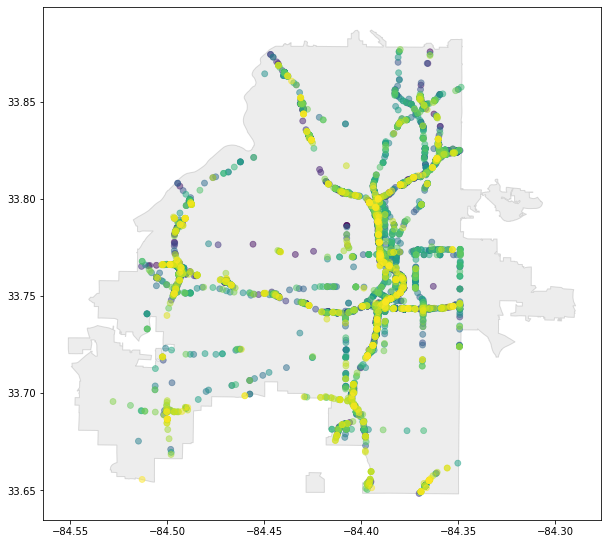

In [108]:
# Set figure size
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
cluster=None

atlanta_shape.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)
geo_df_2019_atlanta.plot(ax=ax, alpha=0.5, cmap='viridis', linewidth=0.8, legend=True, zorder=2)
plt.show()

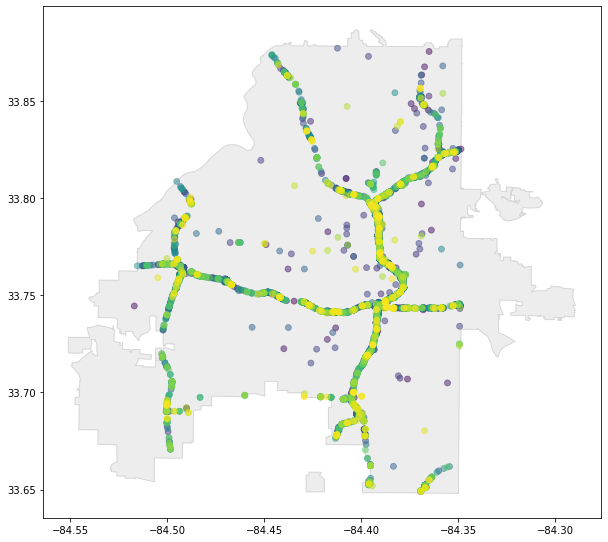

In [104]:
# Set figure size
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
cluster=None

atlanta_shape.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)
geo_df_2020_atlanta.plot(ax=ax, alpha=0.5, cmap='viridis', linewidth=0.8, legend=True, zorder=2)
plt.show()

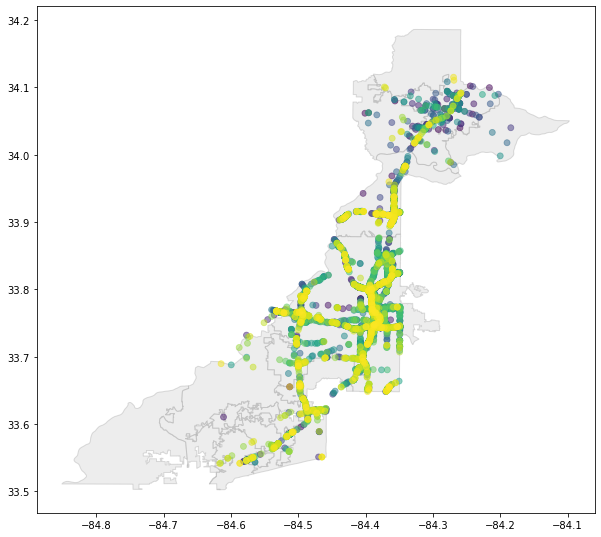

In [105]:
# Set figure size
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
cluster=None

fulton_shape.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)
geo_df_2019.plot(ax=ax, alpha=0.5, cmap='viridis', linewidth=0.8, legend=True, zorder=2)
plt.show()

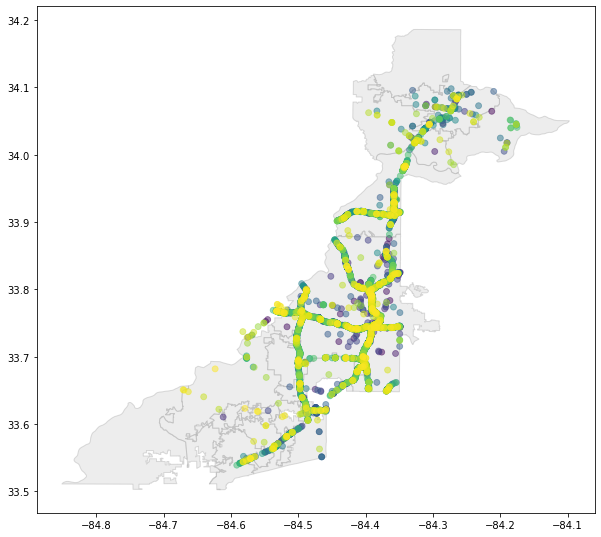

In [109]:
# Set figure size
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
cluster=None

fulton_shape.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)
geo_df_2020.plot(ax=ax, alpha=0.5, cmap='viridis', linewidth=0.8, legend=True, zorder=2)
plt.show()

In [120]:
def plot_geolocation_by_cluster(df, 
                                cluster=None, 
                                title=None, 
                                centers=None,
                                filename=None):
    '''
    Function to plot latitude and longitude coordinates
    #####################
    Args:
        df: pandas dataframe 
            Contains id, latitude, longitude, and color (optional).
        cluster: (optional) column (string) in df 
            Separate coordinates into different clusters
        title: (optional) string
        centers: (optional) array of coordinates for centers of each cluster
        filename: (optional) string  
    #####################
    Returns:
        Plot with lat/long coordinates 
    '''
    
    # Transform df into geodataframe
    geo_df = gpd.GeoDataFrame(df.drop(['longitude', 'latitude'], axis=1),
                           crs={'init': 'epsg:4326'},
                           geometry=[Point(xy) for xy in zip(df.longitude, df.latitude)])
    geo_df = sjoin(geo_df, atlanta_shape, how='inner')
 
    # Set figure size
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    
    atlanta_shape.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)

    # Plot coordinates from geo_df on top of NYC map
    if cluster is not None:
        
        geo_df.plot(ax=ax, column=cluster, alpha=0.5, 
                    cmap='viridis', linewidth=0.8, zorder=2)
        
        if centers is not None:
            centers_gseries = GeoSeries(map(Point, zip(centers[:,1], centers[:,0])))
            centers_gseries.plot(ax=ax, alpha=1, marker='X', color='red', markersize=100, zorder=3)
        
        plt.title(title)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.show()
        
        if filename is not None:
            fig.savefig(f'{filename}', bbox_inches='tight', dpi=300)
    else:
        geo_df.plot(ax=ax, alpha=0.5, cmap='viridis', linewidth=0.8, legend=True, zorder=2)
        
        plt.title(title)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.show()
        
    fig.clf()

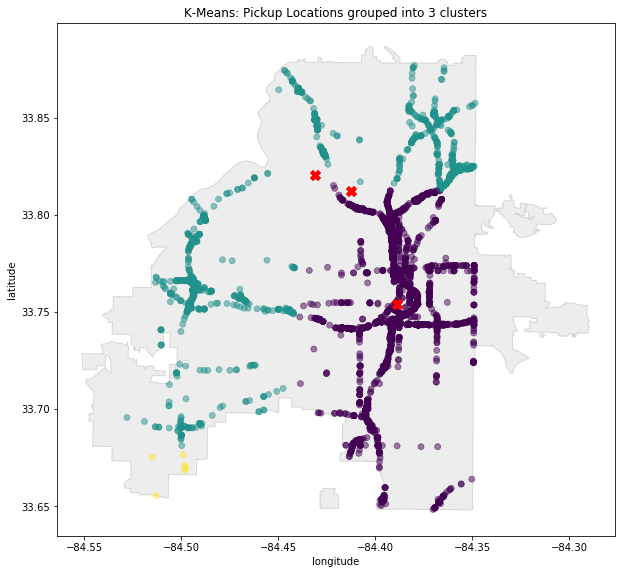

In [131]:
ssd = []


# Find clusters
km = MiniBatchKMeans(n_clusters=3)
km.fit_predict(newdf_2019)

# Label cluster centers
centers = km.cluster_centers_

# Calculate sum of squared distances
ssd.append(km.inertia_)

# Get cluster center
newdf_2019['cluster'] = km.labels_

# Plot lat/long and clusters on map
plot_geolocation_by_cluster(newdf_2019, cluster='cluster', 
                            title= f'K-Means: Pickup Locations grouped into 3 clusters',
                            centers=centers)

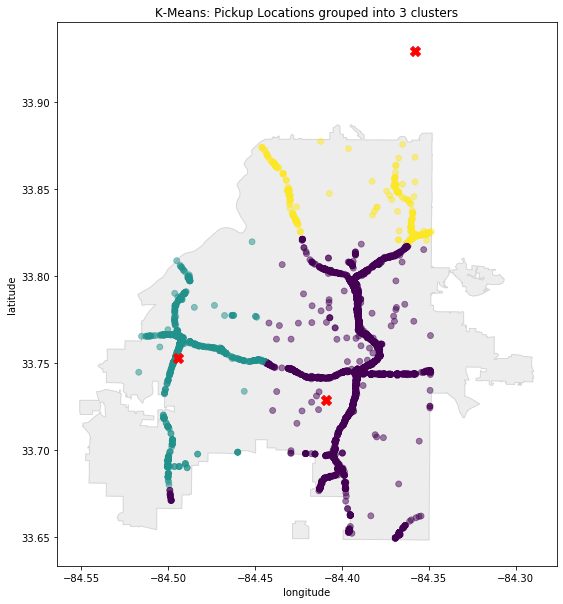

In [153]:
ssd = []


# Find clusters
km = MiniBatchKMeans(n_clusters=3)
km.fit_predict(newdf_2020)

# Label cluster centers
centers = km.cluster_centers_

# Calculate sum of squared distances
ssd.append(km.inertia_)

# Get cluster center
newdf_2020['cluster'] = km.labels_

# Plot lat/long and clusters on map
plot_geolocation_by_cluster(newdf_2020, cluster='cluster', 
                            title= f'K-Means: Pickup Locations grouped into 3 clusters',
                            centers=centers)

In [149]:
db = DBSCAN(eps=2/6371., min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(newdf_2019_np))
db.fit_predict(newdf_2019_np)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)